# Importing Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, mixed_precision
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import VGG19

# Defining Model Architecture (VGG19) and Data Loading

In [3]:
def cnn(input_shape, num_classes):

    base = VGG19(weights = "imagenet", include_top = False, input_shape = input_shape)
    base.trainable = False
    
    model = tf.keras.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        
        layers.Dense(512, activation = "relu"),
        layers.BatchNormalization(),
        
        layers.Dense(256, activation = "relu"),
        layers.BatchNormalization(),

        layers.Dense(128, activation = "relu"),
        layers.BatchNormalization(),

        layers.Dense(num_classes, activation = "softmax")
    ])

    return model

In [4]:
dir = "Dataset/seg_train/"

batch_size = 16
img_h, img_w = 150, 150

train_dataset = tf.keras.utils.image_dataset_from_directory(dir, seed = 100, image_size = (img_h, img_w), batch_size = batch_size)

Found 14034 files belonging to 6 classes.


In [5]:
train_dataset.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Training

In [8]:
model = cnn(input_shape = (150, 150, 3), num_classes = 6)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1

In [11]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [7]:
with tf.device("/GPU:0"):
    history = model.fit(train_dataset, epochs = 20)

Epoch 1/20
878/878 [==============================] - 39s 40ms/step - loss: 0.4405 - accuracy: 0.8418
Epoch 2/20
878/878 [==============================] - 35s 40ms/step - loss: 0.3174 - accuracy: 0.8835
Epoch 3/20
878/878 [==============================] - 35s 40ms/step - loss: 0.2781 - accuracy: 0.8990
Epoch 4/20
878/878 [==============================] - 36s 41ms/step - loss: 0.2530 - accuracy: 0.9056
Epoch 5/20
878/878 [==============================] - 36s 41ms/step - loss: 0.2342 - accuracy: 0.9115
Epoch 6/20
878/878 [==============================] - 36s 41ms/step - loss: 0.2137 - accuracy: 0.9190
Epoch 7/20
878/878 [==============================] - 36s 41ms/step - loss: 0.1931 - accuracy: 0.9296
Epoch 8/20
878/878 [==============================] - 36s 41ms/step - loss: 0.1729 - accuracy: 0.9346
Epoch 9/20
878/878 [==============================] - 36s 41ms/step - loss: 0.1597 - accuracy: 0.9414
Epoch 10/20
878/878 [==============================] - 36s 41ms/step - loss: 0.151

# Saving The Trained Model

In [10]:
model.save("Model With Transfer Learning.h5")

# Inference

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
model = tf.keras.models.load_model("Model With Transfer Learning.h5")

In [34]:
img = cv2.imread("Dataset/seg_test/sea/20081.jpg")

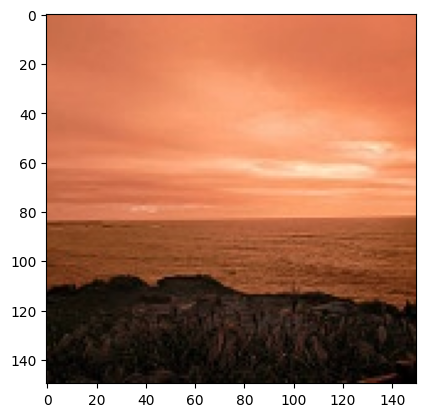

In [35]:
plt.imshow(img)

In [36]:
img = np.expand_dims(img, axis = 0)

In [37]:
img.shape

(1, 150, 150, 3)

In [38]:
a = np.argmax(model.predict(img), axis = 1)[0]

1/1 [==============================] - 0s 112ms/step


In [39]:
train_dataset.class_names[a]

'sea'

## Inference Pipeline

In [50]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

In [43]:
model = load_model("Model With Transfer Learning.h5")

In [47]:
def inference(img_path):
    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.show()

    img = np.expand_dims(img, axis = 0)

    a = np.argmax(model.predict(img), axis = 1)[0]
    return class_names[a]

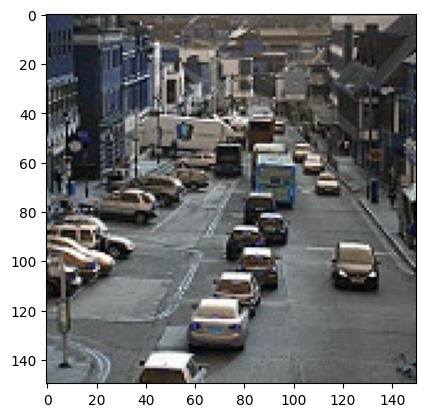

1/1 [==============================] - 0s 14ms/step


'street'

In [70]:
parent_dir = "Dataset/seg_pred/"
a = random.choice(os.listdir(parent_dir))

path = f"{parent_dir}{a}"
inference(path)